In [2]:

from tensorflow import keras
from tensorflow.keras import layers
import sys
sys.path.append("..")
from src.data import Dataset
from src.model import NeuralNetwork

# Training set

In [3]:
d = Dataset(dataset_path="../data/processed/train_07_18_2021.csv")
x_train, x_val, y_train, y_val = d.get_splits()

# Building the network

In [4]:
net = NeuralNetwork(layers=[layers.Dense(units=132, activation='relu'),
                            layers.Dense(units=101, activation='relu'),
                            layers.Dense(units=71, activation='relu'),
                            layers.Dense(units=40, activation='relu'),
                            layers.Dense(10, activation='softmax')], 
                    optimizer=keras.optimizers.SGD(), 
                    loss=keras.losses.SparseCategoricalCrossentropy(), 
                    metrics=["accuracy"])

In [5]:

history = net.fit(x_train, 
        y_train, 
        validation_data=(x_val, y_val),
        batch_size=128, 
        epochs=500);

Epoch 1/350
32/32 - 1s - loss: 65.5751 - accuracy: 0.1151 - val_loss: 4.5140 - val_accuracy: 0.1267
Epoch 2/350
32/32 - 0s - loss: 2.3593 - accuracy: 0.1114 - val_loss: 2.2804 - val_accuracy: 0.1044
Epoch 3/350
32/32 - 0s - loss: 2.2817 - accuracy: 0.1057 - val_loss: 2.2608 - val_accuracy: 0.1067
Epoch 4/350
32/32 - 0s - loss: 2.2803 - accuracy: 0.1067 - val_loss: 2.2580 - val_accuracy: 0.1178
Epoch 5/350
32/32 - 0s - loss: 2.2757 - accuracy: 0.1104 - val_loss: 2.2452 - val_accuracy: 0.1178
Epoch 6/350
32/32 - 0s - loss: 2.2706 - accuracy: 0.1077 - val_loss: 2.2229 - val_accuracy: 0.1200
Epoch 7/350
32/32 - 0s - loss: 2.2660 - accuracy: 0.1161 - val_loss: 2.2188 - val_accuracy: 0.1600
Epoch 8/350
32/32 - 0s - loss: 2.2553 - accuracy: 0.1403 - val_loss: 2.2197 - val_accuracy: 0.1556
Epoch 9/350
32/32 - 0s - loss: 2.2608 - accuracy: 0.1321 - val_loss: 2.2097 - val_accuracy: 0.1600
Epoch 10/350
32/32 - 0s - loss: 2.2628 - accuracy: 0.1321 - val_loss: 2.2086 - val_accuracy: 0.1578
Epoch 11

In [6]:

net.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 132)               17556     
_________________________________________________________________
dense_5 (Dense)              (None, 101)               13433     
_________________________________________________________________
dense_6 (Dense)              (None, 71)                7242      
_________________________________________________________________
dense_7 (Dense)              (None, 40)                2880      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                410       
Total params: 41,521
Trainable params: 41,521
Non-trainable params: 0
_________________________________________________________________


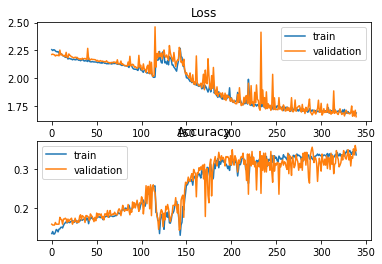

In [7]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'][10:], label='train')
pyplot.plot(history.history['val_loss'][10:], label='validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'][10:], label='train')
pyplot.plot(history.history['val_accuracy'][10:], label='validation')
pyplot.legend()
pyplot.show()

# Test folds performance

In [8]:
import numpy as np

loss = []
accuracy = []

for fold in [5, 7, 8, 9, 10]:
    td = Dataset(dataset_path=f"../data/processed/test_{fold}_07_18_2021.csv", test_size=0)
    x_test, y_test = td.get_splits()
    results = net.model.evaluate(x_test, y_test, batch_size=128)
    loss.append(results[0])
    accuracy.append(results[1])

print("\nAccuracy:")
print(f"\tMean: {np.mean(accuracy)} \n\tStandard deviation: {np.std(accuracy)}")

print("\nLoss:")
print(f"\tMean: {np.mean(loss)} \n\tStandard deviation: {np.std(loss)}")

7/7 [==============================] - 0s 2ms/step - loss: 1.7582 - accuracy: 0.3166

Accuracy:
	Mean: 0.30007954239845275 
	Standard deviation: 0.039899045375181616

Loss:
	Mean: 2.102722930908203 
	Standard deviation: 0.5049015151768104
